In [19]:
from helper_loader import *

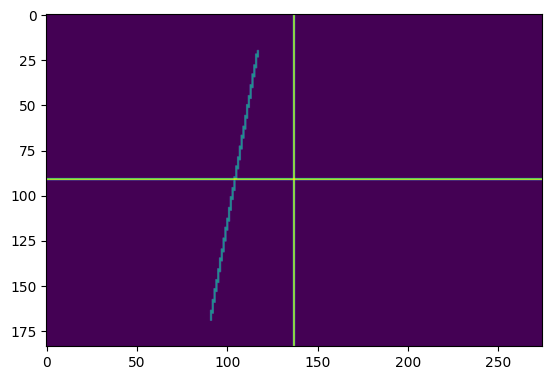

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation
import vedo

vedo.settings.default_backend = "vtk"


def compute_normal(pitch: int, yaw: int) -> np.ndarray:
    normal = [-1, 0, 0]
    rotation = Rotation.from_euler("ZY", [pitch, yaw], degrees=True)

    return rotation.apply(normal)


def slice_image(
    volume: vedo.Volume,
    offset: int,
    pitch: int,
    yaw: int,
    return_mesh: bool = False,
) -> np.ndarray | vedo.Mesh:
    slice_mesh = volume.slice_plane(
        origin=volume.center() + [-offset, 0, 0],
        normal=compute_normal(pitch, yaw),
        autocrop=False,
    )

    if return_mesh:
        return slice_mesh

    return slice_mesh.pointdata["ImageScalars"].reshape(slice_mesh.metadata["shape"])


offset = 50
pitch = 10
yaw = 40

array = np.zeros(shape=(200, 150, 180), dtype=np.uint8)
array[..., (array.shape[2] - 1) // 2] = 1

volume = vedo.Volume(array)
update_cameras(volume.shape)
update_axes(volume.shape)

slice_plane = vedo.Plane(
    pos=volume.center() + [-offset, 0, 0],
    normal=compute_normal(pitch, yaw),
    s=(array.shape[2], array.shape[1]),
)

camera = dict(
    position=volume.center() + [500, 0, 0],
    focal_point=volume.center(),
    viewup=(0, -1, 0),
)

plotter = vedo.Plotter(axes=3)
plotter += [volume, slice_plane]
plotter.show(camera=camera)

image = slice_image(volume, offset, pitch, yaw)

# Show the center of the image
image[(image.shape[0] - 1) // 2] = 2
image[:, (image.shape[1] - 1) // 2] = 2

plt.imshow(image)
plt.show()

In [21]:
mesh = slice_image(volume, offset, pitch, yaw, return_mesh=True)

mesh.metadata["original_bounds"]

array([-104.42152225,  169.57847775,  -94.73552311,   88.26447689,
          0.        ,    0.        ])

In [22]:
mesh.bounds()

array([-24.137419 , 166.11662  , -29.574123 , 168.19255  ,  -1.8782065,
       229.17224  ], dtype=float32)

In [23]:
mesh.metadata["shape"]

array([184, 275])

In [24]:
print(
    f"Using original_bounds:\n"
    f"\txmax - xmin = {mesh.metadata['original_bounds'][1] - mesh.metadata['original_bounds'][0]},\n"
    f"\tymax - ymin = {mesh.metadata['original_bounds'][3] - mesh.metadata['original_bounds'][2]},\n"
    f"\tzmax - zmin = {mesh.metadata['original_bounds'][5] - mesh.metadata['original_bounds'][4]},\n"
)
print(
    f"Using .bounds():\n"
    f"\txmax - xmin = {mesh.bounds()[1] - mesh.bounds()[0]},\n"
    f"\tymax - ymin = {mesh.bounds()[3] - mesh.bounds()[2]},\n"
    f"\tzmax - zmin = {mesh.bounds()[5] - mesh.bounds()[4]},\n"
)

Using original_bounds:
	xmax - xmin = 274.0,
	ymax - ymin = 183.0,
	zmax - zmin = 0.0,

Using .bounds():
	xmax - xmin = 190.25404357910156,
	ymax - ymin = 197.7666778564453,
	zmax - zmin = 231.05044555664062,



In [25]:
volume.center()

array([99.5, 74.5, 89.5])

In [26]:
(
    f"{(mesh.bounds()[1] - mesh.bounds()[0]) // 2}, "
    f"{(mesh.bounds()[3] - mesh.bounds()[2]) // 2}, "
    f"{(mesh.bounds()[5] - mesh.bounds()[4]) // 2}"
)

'95.0, 98.0, 115.0'

In [27]:
plane = vedo.Plane(
    pos=volume.center() + [-offset, 0, 0],
    normal=compute_normal(settings.pitch, settings.pitch),
    s=(
        mesh.bounds()[3] - mesh.bounds()[2],
        mesh.bounds()[1] - mesh.bounds()[0],
    ),
)
show(
    plane,
    camera=coronal_camera,
)

In [28]:
plane.bounds()

array([-51.52259 , 150.52258 , -35.955116, 184.95512 ,   8.499511,
       170.50049 ], dtype=float32)